<a href="https://colab.research.google.com/github/mrsupiri/Data-Storm-1.0/blob/master/DataStrom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd

customer_data = pd.read_csv("/content/drive/My Drive/Data Set/customer_data .csv")
sales_detal = pd.read_csv("/content/drive/My Drive/Data Set/sales_detail .csv")
sales_summary = pd.read_csv("/content/drive/My Drive/Data Set/sales_summary .csv")

In [3]:
from datetime import date, datetime

def diff_month(d1, d2):
    return abs((d1.year - d2.year) * 12 + d1.month - d2.month)

def calculate_age(birth_year):
    if not birth_year:
        return 0
    try:
        return int(date.today().year - birth_year)   
    except:
        return 0

def calculate_age_group(age):
        if age < 1:
            return 0
        elif age < 13:
            return 1
        elif age < 20:
            return 2
        elif age < 30:
            return 3
        elif age < 60:
            return 4
        elif age < 110:
            return 5
        else:
            return 0
def calculate_visits(customer_id):
    return len(sales_detal.loc[sales_detal['customer_id'] == customer_id].sort_values(by=['end_date']))

def calcualte_churns(customer_id):
    churns = 0
    data = list(sales_detal.loc[sales_detal['customer_id'] == customer_id].sort_values(by=['end_date']).itertuples())
    for i in range(0, len(data), 2):
        try:
            day_1 = datetime.strptime(data[i].end_date, '%Y-%m-%d')
            day_2 = datetime.strptime(data[i+1].end_date, '%Y-%m-%d')
            if diff_month(day_1, day_2) > 2:
                churns += 1
        except IndexError:
            pass
    return churns


customer_data['age'] = customer_data.birth_year.apply(calculate_age)
customer_data['age_group'] = customer_data.age.apply(calculate_age_group)
customer_data['visits'] = customer_data.customer_id.apply(calculate_visits)
customer_data['churns'] = customer_data.customer_id.apply(calcualte_churns)
customer_data.head()

,customer_id,gender,birth_year,age,age_group,visits,churns
0,169212,female,1980.0,40,4,145,0
1,174861,female,1969.0,51,4,379,0
2,198521,male,1978.0,42,4,252,0
3,206454,male,1965.0,55,4,430,0
4,218494,male,1959.0,61,5,58,2


In [4]:
customer_data.loc[customer_data['churns'] >= 1]

,customer_id,gender,birth_year,age,age_group,visits,churns
4,218494,male,1959.0,61,5,58,2
7,302384,male,1967.0,53,4,104,2
8,306612,male,1989.0,31,4,34,2
11,330557,male,1977.0,43,4,72,2
13,348880,female,1946.0,74,5,292,1
...,...,...,...,...,...,...,...
9988,881733,male,1986.0,34,4,5,2
9990,982371,female,1974.0,46,4,26,3
9991,1008354,male,1974.0,46,4,12,1
9993,1120459,NaN,NaN,0,0,34,2


In [5]:
len(customer_data['customer_id'].unique())

10000

In [6]:
customer_data.loc[customer_data['customer_id'] == 708470]

,customer_id,gender,birth_year,age,age_group,visits,churns
35,708470,NaN,NaN,0,0,8,0


In [7]:
sales_detal.head()

,customer_id,year,month,catagory_code,total_spent_for_category,end_date
0,337134,2017,6,B117,2226.0,2017-06-30
1,950216,2018,2,B115,1131.0,2018-02-28
2,824818,2018,2,B115,960.0,2018-02-28
3,547554,2018,7,B115,345.0,2018-07-31
4,176602,2017,5,B115,217.5,2017-05-31


In [8]:
sales_summary.head()

,customer_id,year,month,weekend_amount_spent,Num_of_weekend_visits,total_amount_spent,total_num_of_visits,end_date
0,519123,2019,4,13385.67,3,23558.22,10,2019/04/30
1,1181034,2019,4,4810.00,2,8785.00,4,2019/04/30
2,510205,2019,4,21662.76,3,23632.74,4,2019/04/30
3,1311201,2019,4,1932.19,1,3813.19,4,2019/04/30
4,341451,2019,4,1433.50,1,9450.19,3,2019/04/30


In [9]:
sales_detal.loc[sales_detal['customer_id'] == 950216].sort_values(by=['end_date'])

,customer_id,year,month,catagory_code,total_spent_for_category,end_date
574726,950216,2017,12,B107,450.0,2017-12-31
407724,950216,2018,1,B115,337.5,2018-01-31
351798,950216,2018,1,B116,90.0,2018-01-31
154683,950216,2018,1,B107,450.0,2018-01-31
1,950216,2018,2,B115,1131.0,2018-02-28
726417,950216,2018,5,B116,52.5,2018-05-31
507837,950216,2018,5,B107,360.0,2018-05-31
534060,950216,2018,5,B115,337.5,2018-05-31
102802,950216,2018,7,B116,180.0,2018-07-31
243437,950216,2018,12,B115,30.0,2018-12-31


In [10]:
sales_summary.loc[sales_summary['customer_id'] == 169212].sort_values(by=['end_date'])

,customer_id,year,month,weekend_amount_spent,Num_of_weekend_visits,total_amount_spent,total_num_of_visits,end_date
125560,169212,2017,2,100.00,0,7895.58,3,2017/02/28
55164,169212,2017,6,1960.75,1,1960.75,1,2017/06/30
85927,169212,2017,8,1163.50,1,6243.27,2,2017/08/31
61561,169212,2017,9,4082.50,1,4082.50,1,2017/09/30
123471,169212,2017,10,1654.00,1,1654.00,1,2017/10/31
135058,169212,2017,11,100.00,0,4598.50,1,2017/11/30
66420,169212,2017,12,2063.46,1,3724.71,4,2017/12/31
9173,169212,2018,1,1548.25,1,1548.25,1,2018/01/31
92687,169212,2018,2,7043.95,3,10651.45,4,2018/02/28
84402,169212,2018,3,100.00,0,6072.25,3,2018/03/31


In [0]:
import matplotlib.pyplot as plt

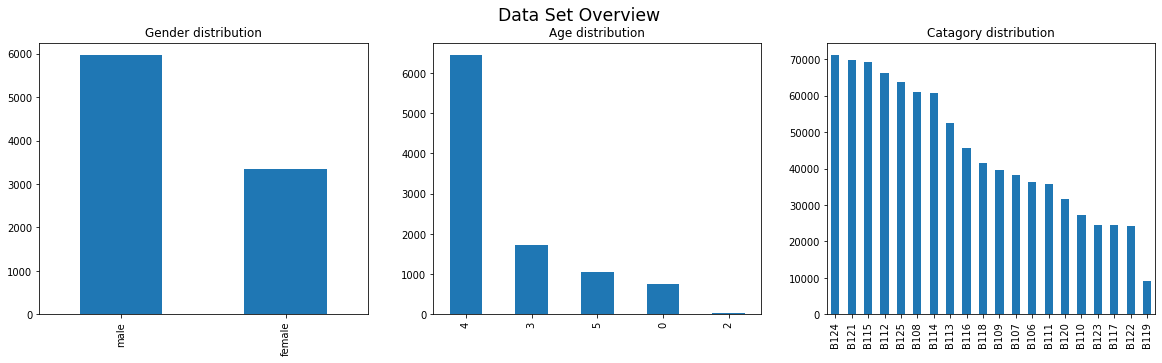

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
customer_data['gender'].value_counts().plot(ax=ax[0], kind='bar')
ax[0].set_title("Gender distribution")
customer_data['age_group'].value_counts().plot(ax=ax[1], kind='bar')
ax[1].set_title("Age distribution")
sales_detal['catagory_code'].value_counts().plot(ax=ax[2], kind='bar')
ax[2].set_title("Catagory distribution")
fig.suptitle("Data Set Overview", fontsize="xx-large")
fig.show()

In [0]:
# df = pd.DataFrame()
# for customer in customer_data.itertuples():
#     data = list(sales_detal.loc[sales_detal['customer_id'] == customer_id].sort_values(by=['end_date']).itertuples())
#     for i in range(0, len(data), 2):
#         try:
#             day_1 = datetime.strptime(data[i].end_date, '%Y-%m-%d')
#             day_2 = datetime.strptime(data[i+1].end_date, '%Y-%m-%d')
#             if diff_month(day_1, day_2) < 1:
#                 for i in range(diff_month(day_1, day_2)):
                    
#         except IndexError:
#             pass

In [14]:
from tqdm import tqdm
data_set = []
for customer in tqdm(customer_data.itertuples()):
    data = list(sales_summary.loc[sales_summary['customer_id'] == customer.customer_id].sort_values(by=['end_date']).itertuples())
    for i in range(0, len(data)-1):
        day_1 = datetime.strptime(data[i].end_date, '%Y/%m/%d')
        day_2 = datetime.strptime(data[i+1].end_date, '%Y/%m/%d')
        data[i] = data[i]._asdict()
        if i == 0:
            data[i]["total_amount_spent_change"] = data[i]["total_amount_spent"]
            data[i]["weekend_amount_spent_change"] = data[i]["weekend_amount_spent"]
            data[i]["Num_of_weekend_visits_change"] = data[i]["Num_of_weekend_visits"]
            data[i]["total_num_of_visits_change"] = data[i]["total_num_of_visits"]
        else:
            data[i]["total_amount_spent_change"] = data[i]["total_amount_spent"] - data[i-1]["total_amount_spent"]
            data[i]["weekend_amount_spent_change"] = data[i]["weekend_amount_spent"] - data[i-1]["weekend_amount_spent"]
            data[i]["Num_of_weekend_visits_change"] = data[i]["Num_of_weekend_visits"] - data[i-1]["Num_of_weekend_visits"]
            data[i]["total_num_of_visits_change"] = data[i]["total_num_of_visits"] - data[i-1]["total_num_of_visits"]
        data[i]["age_group"] = customer.age_group
        data[i]["gender"] = customer.gender
        del data[i]["Index"]
        if diff_month(day_1, day_2) > 2:
            data[i]["target"] = 1
        else:
            data[i]["target"] = 0
        data_set.append(data[i])

10000it [00:34, 292.66it/s]


In [15]:
df = pd.DataFrame(data_set)
def map_gender(gender):
    if gender == "female":
        return 0
    else:
        return 1
# df.drop(['end_date'], 1, inplace=True)
df.head(32)

,customer_id,year,month,weekend_amount_spent,Num_of_weekend_visits,total_amount_spent,total_num_of_visits,end_date,total_amount_spent_change,weekend_amount_spent_change,Num_of_weekend_visits_change,total_num_of_visits_change,age_group,gender,target
0,169212,2017,2,100.00,0,7895.58,3,2017/02/28,7895.58,100.00,0,3,4,female,1
1,169212,2017,6,1960.75,1,1960.75,1,2017/06/30,-5934.83,1860.75,1,-2,4,female,0
2,169212,2017,8,1163.50,1,6243.27,2,2017/08/31,4282.52,-797.25,0,1,4,female,0
3,169212,2017,9,4082.50,1,4082.50,1,2017/09/30,-2160.77,2919.00,0,-1,4,female,0
4,169212,2017,10,1654.00,1,1654.00,1,2017/10/31,-2428.50,-2428.50,0,0,4,female,0
5,169212,2017,11,100.00,0,4598.50,1,2017/11/30,2944.50,-1554.00,-1,0,4,female,0
6,169212,2017,12,2063.46,1,3724.71,4,2017/12/31,-873.79,1963.46,1,3,4,female,0
7,169212,2018,1,1548.25,1,1548.25,1,2018/01/31,-2176.46,-515.21,0,-3,4,female,0
8,169212,2018,2,7043.95,3,10651.45,4,2018/02/28,9103.20,5495.70,2,3,4,female,0
9,169212,2018,3,100.00,0,6072.25,3,2018/03/31,-4579.20,-6943.95,-3,-1,4,female,0


In [16]:
from tqdm import tqdm
customer_data_set = []
for customer in tqdm(customer_data.itertuples()):
    data = list(df.loc[df['customer_id'] == customer.customer_id].itertuples())
    customer_ = customer._asdict()
    customer_["total_amount_spent_change"] = 0
    customer_["weekend_amount_spent_change"] = 0
    customer_["Num_of_weekend_visits_change"] = 0
    customer_["total_num_of_visits_change"] = 0
    customer_["transactions"] = 0
    customer_["target"] = 0
    for entry in data:
        customer_["total_amount_spent_change"] += entry.total_amount_spent_change
        customer_["weekend_amount_spent_change"] += entry.weekend_amount_spent_change
        customer_["Num_of_weekend_visits_change"] += entry.Num_of_weekend_visits_change
        customer_["total_num_of_visits_change"] += entry.total_num_of_visits_change
        customer_["transactions"] += 1
        customer_["target"] = entry.target
    del customer_["Index"]
    customer_data_set.append(customer_)

10000it [00:30, 324.29it/s]


In [17]:
customer_df = pd.DataFrame(customer_data_set)
customer_df['gender'] = customer_df.gender.apply(map_gender)
customer_df.head()

,customer_id,gender,birth_year,age,age_group,visits,churns,total_amount_spent_change,weekend_amount_spent_change,Num_of_weekend_visits_change,total_num_of_visits_change,transactions,target
0,169212,0,1980.0,40,4,145,0,4102.30,2564.50,1,3,30,0
1,174861,0,1969.0,51,4,379,0,31705.89,10917.70,2,10,35,0
2,198521,1,1978.0,42,4,252,0,5674.42,4174.96,3,4,34,0
3,206454,1,1965.0,55,4,430,0,12738.51,5270.68,3,7,35,0
4,218494,1,1959.0,61,5,58,2,797.50,797.50,1,1,8,0


In [0]:
import numpy as np

In [39]:
from sklearn import preprocessing
# features = df.drop(['customer_id', 'target', 'total_amount_spent', 'weekend_amount_spent', 'Num_of_weekend_visits', 'total_num_of_visits'], 1)
features = customer_df.drop(['customer_id', 'target', 'birth_year', 'age'], 1)
X = np.array(features.astype(float))
# X = preprocessing.scale(X)
y = np.array(customer_df['target'])
features.head(10)

,gender,age_group,visits,churns,total_amount_spent_change,weekend_amount_spent_change,Num_of_weekend_visits_change,total_num_of_visits_change,transactions
0,0,4,145,0,4102.30,2564.50,1,3,30
1,0,4,379,0,31705.89,10917.70,2,10,35
2,1,4,252,0,5674.42,4174.96,3,4,34
3,1,4,430,0,12738.51,5270.68,3,7,35
4,1,5,58,2,797.50,797.50,1,1,8
5,0,4,540,0,41302.57,34012.12,5,8,35
6,1,4,7,0,0.00,0.00,0,0,0
7,1,4,104,2,992.26,992.26,1,1,25
8,1,4,34,2,1211.50,100.00,0,1,25
9,1,4,208,0,7605.40,100.00,0,6,30


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [0]:
import xgboost as xgb

In [0]:
D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)

In [0]:
param = {
    'eta': 0.31, 
    'max_depth': 5,  
    'objective': 'binary:logistic',
} 
steps = 30

In [0]:
model = xgb.train(param, D_train, steps)

In [45]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

best_preds = model.predict(D_test)
best_preds = np.asarray([np.around(line) for line in best_preds])

print("Precision =", precision_score(Y_test, best_preds, average='micro'))
print("Recall =", recall_score(Y_test, best_preds, average='micro'))
print("F1 Score =", f1_score(Y_test, best_preds, average='micro'))
print("Accuracy =", accuracy_score(Y_test, best_preds))

Precision = 0.827
Recall = 0.827
F1 Score = 0.827
Accuracy = 0.827


In [0]:
submission = pd.read_csv("/content/drive/My Drive/sample_submission.csv")
submission_data = []
for customer in submission.itertuples():
    customer_df_ = customer_df.loc[customer_df['customer_id'] == customer.customer_id].tail(1)
    customer_ = list(customer_df_.itertuples())[0]
    customer_ = customer_._asdict()
    D_predict = xgb.DMatrix(np.array(customer_df_.drop(['customer_id', 'target', 'birth_year', 'age'], 1)).astype(float))
    best_preds = model.predict(D_predict)
    customer_['prob'] = best_preds[0]
    # print(customer_df_["customer_id"], best_preds[0])
    submission_data.append(customer_)

In [0]:
customer_df.head()

In [48]:
final_df = pd.DataFrame(submission_data)
final_df.sample(20)

,Index,customer_id,gender,birth_year,age,age_group,visits,churns,total_amount_spent_change,weekend_amount_spent_change,Num_of_weekend_visits_change,total_num_of_visits_change,transactions,target,prob
4135,2048,1176201,1,1970.0,50,4,21,0,490.24,490.24,1,1,5,0,0.351461
1968,8742,232033,1,1967.0,53,4,411,0,25484.57,3022.00,3,15,35,0,0.000952
2214,8747,358196,0,1985.0,35,4,194,0,7772.50,100.00,0,3,24,0,0.028778
3912,444,408256,1,1983.0,37,4,186,0,13617.74,5453.18,1,5,31,0,0.005710
2427,8158,489093,1,1955.0,65,5,91,1,18852.42,2269.96,1,6,17,0,0.026393
3729,3941,1079863,0,1995.0,25,3,24,1,2930.59,2020.09,3,4,9,0,0.246311
690,3921,708721,1,1962.0,58,4,202,0,16110.10,2452.00,2,8,33,0,0.002683
2808,9595,1321340,1,1990.0,30,4,65,0,4033.00,100.00,0,2,9,0,0.063870
3421,8565,1062957,1,1985.0,35,4,41,2,3007.84,1576.84,1,2,14,0,0.285745
875,5411,1018306,1,NaN,0,0,22,1,7005.40,5489.92,1,2,8,0,0.230419


In [0]:
final_df[["customer_id", "prob"]].to_csv("short_circuits.csv", index=False)